<a href="https://colab.research.google.com/github/Pirognoe/Smart_DA/blob/main/Smart_Group_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузка входных данных

---
В ячейке ниже находится вшитый в Гугл Колаб загрузчик файлов; 

Нажав на кнопку  запуска слева - мы сгенерируем кнопку "Обзор" и сможем загрузить интересующие нас файлы через обычный проводник. Можно было выгрузить файлы на Гугл Диск и с помощью библиотек навигации открыть эти файлы, я же решил что с кнопкой будет наглядней и проще для запуска на стороннем сервере.

Можно выбрать сразу несколько файлов.

In [1]:
from google.colab import files
files.upload()

{}

## Установка необходимых пакетов


---

Для отрисовки OHLC графиков есть уже много решений из коробки - я выбирал между ***mathplotlib finance*** и ***Plotly***. Остановил свой выбор на первом, потому что хотел показать как в Гугл Коллаб устанавливать пакет и мне не очень понравился интерактивный график от второго - сильно тормозил

In [5]:
!pip install mplfinance

# Секция импорта необходимых библиотек и модулей


---
А также первичной вычитки данных


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import mplfinance as fplt
%matplotlib inline
daily_data = pd.read_csv('1_ROL_daily.csv',index_col=1, parse_dates=True)
intraday_data = pd.read_csv('1_ROL_intraday.csv', parse_dates=[[1, 2]], index_col=0)
task2_data = pd.read_csv('2_news.csv', parse_dates=[[2, 3]], index_col=1)
task3_input = pd.read_csv('3_2020-03-16 SPY.txt', parse_dates=[0], index_col=6)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



В ячейке ниже согласно общепринятых традиций - проверим результат вычитки данных и убедимся что индексы в формате Даты и времени, значения тикера в числовом

In [7]:
print('Intraday TICKER Internals', '\n',
    intraday_data.dtypes, 
      '\n',
      '\n', 
      intraday_data.index,
      '\n',
      '\n',
      intraday_data.head,
      '\n',
      '\n',
      'DAILY TICKER Internals','\n',
      daily_data.dtypes,
      '\n',
      '\n', 
      daily_data.index,
      '\n',
      '\n', 
      daily_data.head,)

Intraday TICKER Internals 
 id          int64
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object 
 
 DatetimeIndex(['2020-12-08 09:30:00', '2020-12-08 09:31:00',
               '2020-12-08 09:32:00', '2020-12-08 09:33:00',
               '2020-12-08 09:34:00', '2020-12-08 09:35:00',
               '2020-12-08 09:36:00', '2020-12-08 09:37:00',
               '2020-12-08 09:38:00', '2020-12-08 09:39:00',
               ...
               '2020-12-24 09:48:00', '2020-12-24 09:51:00',
               '2020-12-24 09:52:00', '2020-12-24 09:53:00',
               '2020-12-24 09:54:00', '2020-12-24 09:55:00',
               '2020-12-24 09:56:00', '2020-12-24 09:57:00',
               '2020-12-24 09:58:00', '2020-12-24 09:59:00'],
              dtype='datetime64[ns]', name='date_time', length=4595, freq=None) 
 
 <bound method NDFrame.head of                              id    open    high    low   close  volume
date_time                      

Отрисуем дневной тикер в заданом диапазоне;
Предпочитаю тёмные стили, не уверён что могу точно назвать все паттерны на графике

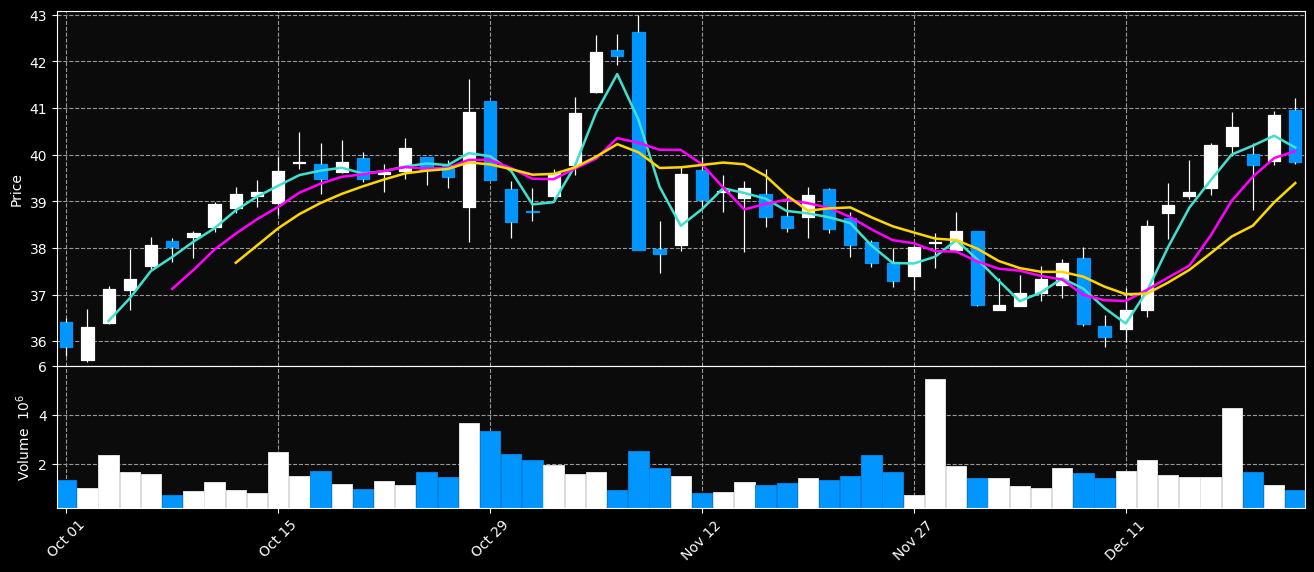

In [8]:
fplt.plot( daily_data.loc['2020-10':'2020-12']
           ,figratio=(30,12)
          ,type = 'candle'
          #,title='ROLLINS , Daily, Oct - Dec 2020'
          , mav=(3,6,9)
          ,volume=True
          , style = 'nightclouds'
          , tight_layout = True
                           )

И такое же упражнение для Интрадей Тикера;
Сразу бросается в глаза огромный спад после *10 декабря*

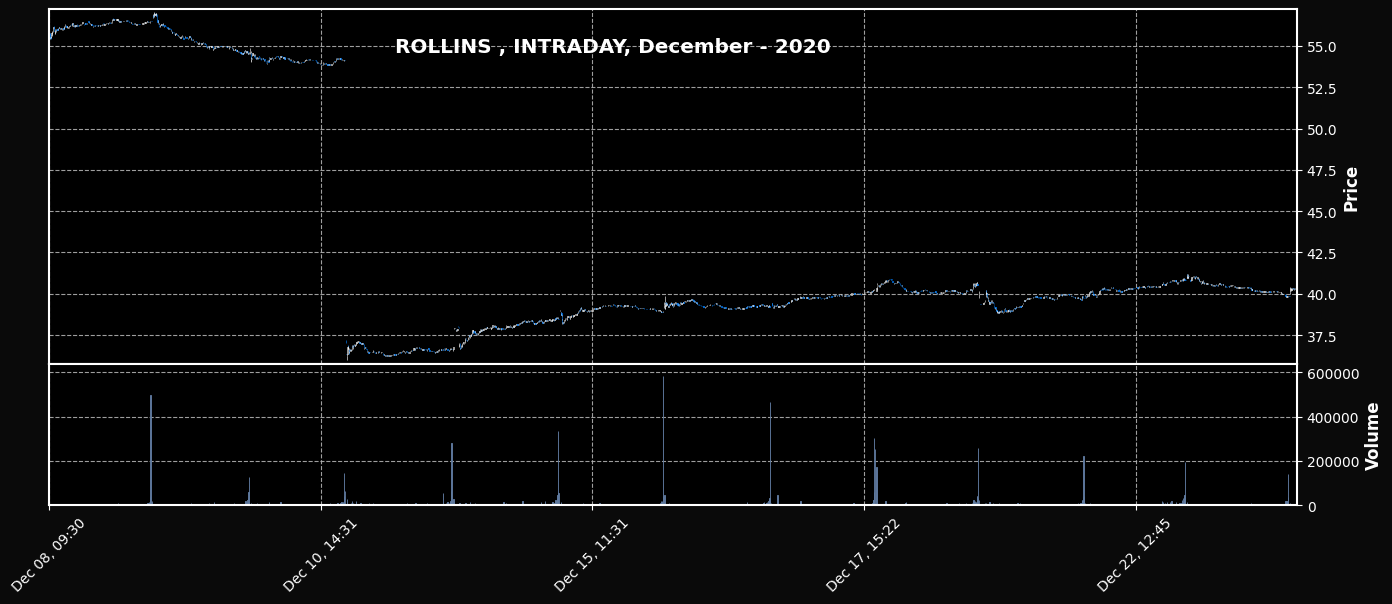

In [9]:
fplt.plot( intraday_data #.loc['2020 Dec 08':'2020 Dec 09']
           ,figratio=(30,12)
          ,type = 'candle'
          , title='ROLLINS , INTRADAY, December - 2020'
          #, mav=(3,6,9)
          ,volume=True
          , style = 'mike'
          , tight_layout = True
                           )


В принципе в новостных сайтах говорится о дроблении акций Компании с привязкой на 2 даты - 10 ноября 2020 и 10 декабря 2020. Очевидно большая синяя свеча 10 ноября соответсвует этому объявлению и последующий всплеск в интрадей тикере перед 10 декабря.
---

[**Оригинал статьи в интернетах**](https://www.prnewswire.com/news-releases/rollins-inc-announces-three-for-two-stock-split-regular-quarterly-and-special-cash-dividend-301161090.html)

> ATLANTA, Oct. 27, 2020 /PRNewswire/ -- Rollins, Inc. (NYSE:ROL), a premier global consumer and commercial services company announced today that the Board of Directors has approved a three-for-two stock split of the Company's common shares.
>
> The split will be affected by issuing one additional share of common stock for every two shares of common stock held.  The additional shares will be distributed on December 10, 2020, to stockholders of record at the close of business on November 10, 2020.  Fractional share amounts resulting from the split will be paid to shareholders in cash.
>
> In addition, the Company declared a regular quarterly cash dividend on its common stock of \$0.08 per share plus a special year-end dividend of \$0.13 per share both payable December 10, 2020 to stockholders of record at the close of business November 10, 2020.  Dividends will be paid on pre-split shares.





Напоследок пример с Plotly и интерактивным графиком

In [ ]:
candlestick = go.Candlestick(
                            x=daily_data.index,
                            open=daily_data['open'],
                            high=daily_data['high'],
                            low=daily_data['low'],
                            close=daily_data['close']
                            )

fig = go.Figure(data=[candlestick])

fig.show()

# Task 2

In [ ]:
task2_data.dtypes
task2_data.index
task2_data.columns
task2_data.head

In [ ]:
pd.unique(task2_data['id_primary_ticker'])

In [ ]:
table = pd.pivot_table( task2_data,index='id_primary_ticker', columns='id_source', aggfunc='count')
table

In [ ]:
task2_data.pivot( index='id_primary_ticker', columns=['id_source', 'date_time'], values='move_date')

In [ ]:
task3_input.columns
task3_input.drop(columns=['Unnamed: 12'])

In [ ]:
task3_input.plot(y = 'price', figsize=(30,13))